In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('bank.csv',sep=';')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [ ]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [ ]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [ ]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [ ]:
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [ ]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [ ]:
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [ ]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [ ]:
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [ ]:
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [ ]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [ ]:
#feature creation part
x1=pd.get_dummies(df['job'])
x2=pd.get_dummies(df['education'])
x3=pd.get_dummies(df['day_of_week'])
x4=pd.get_dummies(df['month'])



In [ ]:
df=df.drop(['job','education','day_of_week','month'], axis=1)

In [ ]:
indexNames = df[df["marital"] == "unknown"].index
df.drop(indexNames, inplace=True)
df.loc[df["marital"] == "married","marital"]=1
df.loc[df["marital"] == "single","marital"]=0
df.loc[df["marital"] == "divorced","marital"]=2
df['marital'].value_counts()

1    24928
0    11568
2     4612
Name: marital, dtype: int64

In [ ]:
df.loc[df["default"] == 'no',"default"]=1
df.loc[df["default"] == 'yes',"default"]=2
df.loc[df["default"] == 'unknown',"default"]=0

In [ ]:
df.loc[df["housing"] == 'no',"housing"]=1
df.loc[df["housing"] == 'yes',"housing"]=2
df.loc[df["housing"] == 'unknown',"housing"]=0



In [ ]:
df.loc[df["loan"] == 'no',"loan"]=1
df.loc[df["loan"] == 'yes',"loan"]=2
df.loc[df["loan"] == 'unknown',"loan"]=0

In [ ]:
df.loc[df['contact']=='cellular','contact']=0
df.loc[df['contact']=='telephone','contact']=1


In [ ]:
df.loc[df["poutcome"] == 'nonexistent',"poutcome"]=0
df.loc[df["poutcome"] == 'failure',"poutcome"]=1
df.loc[df["poutcome"] == 'success',"poutcome"]=2


In [ ]:
df.loc[df["y"] == 'no',"y"]=0
df.loc[df["y"] == 'yes',"y"]=1

In [ ]:
df.columns

Index(['age', 'marital', 'default', 'housing', 'loan', 'contact', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
df=pd.concat([df,x1,x2,x3,x4],axis=1, sort=False)

In [ ]:
df.shape

(41188, 52)

In [ ]:
df.head()

,age,marital,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown,fri,mon,thu,tue,wed,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
0,56.0,1.0,1.0,1.0,1.0,1.0,261.0,1.0,999.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,57.0,1.0,0.0,1.0,1.0,1.0,149.0,1.0,999.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,37.0,1.0,1.0,2.0,1.0,1.0,226.0,1.0,999.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,40.0,1.0,1.0,1.0,1.0,1.0,151.0,1.0,999.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,56.0,1.0,1.0,1.0,2.0,1.0,307.0,1.0,999.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
df=df.dropna()

In [ ]:
X=df.drop('y',axis=1)
y = df['y']
X = X.values.astype(np.float)
y = y.values.astype(np.float)

In [ ]:
X2=df.drop('y',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=2020)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train) 
knn.score(X_test, y_test)
y_pred=knn.predict(X_test)


In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9042811967891025


In [ ]:
import matplotlib.pyplot as plt 


In [ ]:
a=[]
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train) 
    accuracy=knn.score(X_test, y_test)
    a.append(accuracy)
print(a)

[0.8888348333738749, 0.8969837022622233, 0.9017270737046947, 0.9056190707856969, 0.9042811967891025, 0.9030649477012892, 0.9054974458769156, 0.9061055704208222, 0.907929944052542, 0.908294818778886, 0.9086596935052299, 0.9093894429579178, 0.9103624422281683, 0.9109705667720749, 0.9109705667720749, 0.9107273169545123, 0.9093894429579178, 0.9108489418632936, 0.9107273169545123, 0.9106056920457309, 0.909875942593043, 0.9096326927754804, 0.9089029433227925, 0.9099975675018244, 0.909875942593043, 0.9097543176842617, 0.9099975675018244, 0.9097543176842617, 0.9099975675018244]


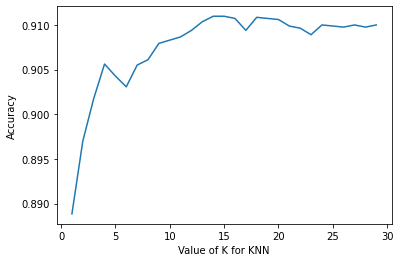

In [ ]:
plt.plot(range(1,30), a)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
max(a)

0.9109705667720749

In [ ]:
a.index(max(a))

13

In [ ]:
import seaborn as sns

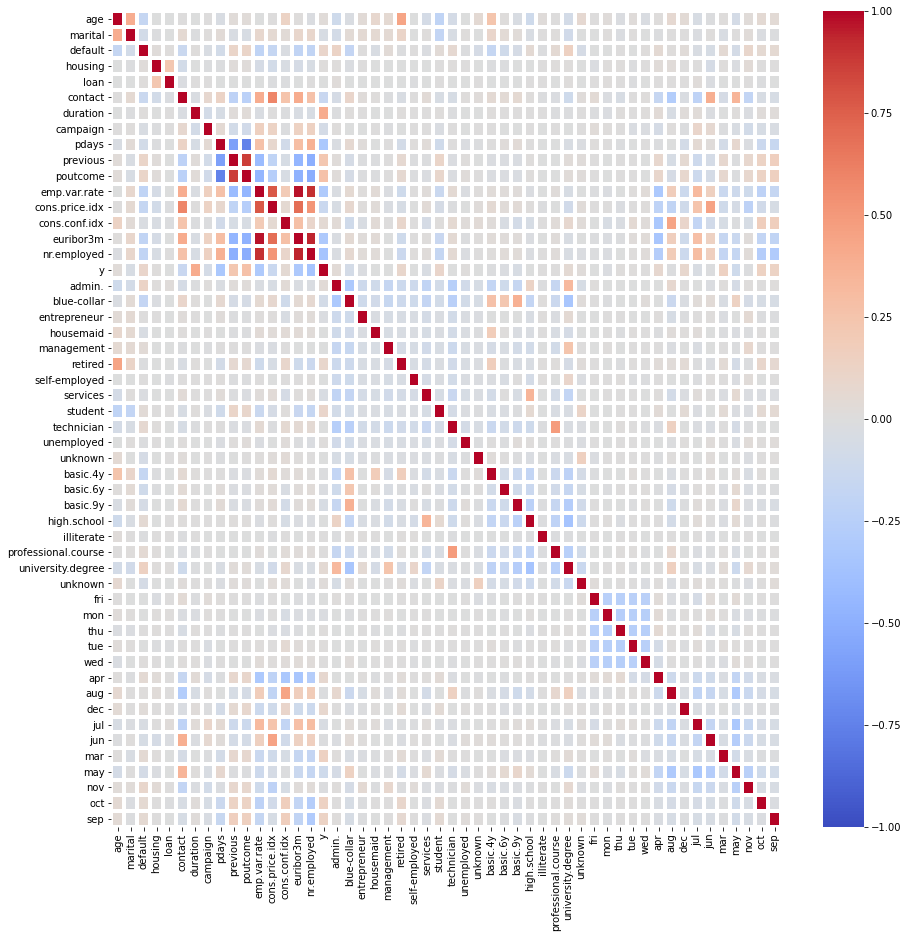

In [ ]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
rf = RandomForestRegressor()
rf.fit(X, y)
feat_importances = pd.Series(rf.feature_importances_, index=X2.columns)

Text(0.5, 0, 'relative importance')

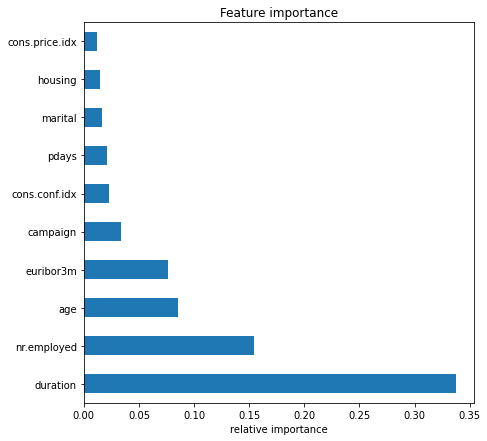

In [ ]:
f, ax = plt.subplots(figsize=(7, 7))
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature importance')
plt.xlabel('relative importance')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


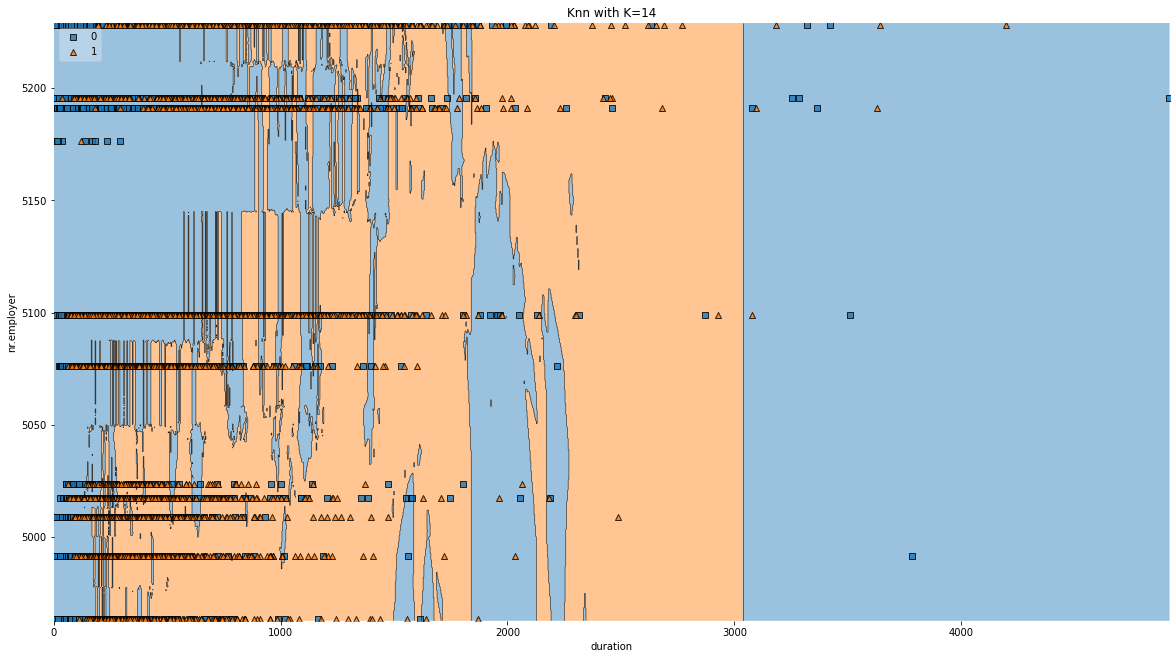

In [ ]:
f, ax = plt.subplots(figsize=(20, 11))
x = df[['duration','nr.employed']].values
y = df['y'].astype(int).values
clf = neighbors.KNeighborsClassifier(n_neighbors=14)
clf.fit(x, y)
plot_decision_regions(x, y, clf=clf, legend=2)
plt.xlabel('duration')
plt.ylabel('nr.employer')
plt.title('Knn with K=14')
plt.show()

In [ ]:
X3=df.drop('y',axis=1)
X3=X3.drop('duration',axis=1)
y = df['y']
X3 = X3.values.astype(np.float)
y = y.values.astype(np.float)

In [ ]:
X4=df.drop('y',axis=1)
X4=X4.drop('duration',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.20,random_state=2020)
b=[]
for k in range(1,30):
    knn3 = KNeighborsClassifier(n_neighbors=k)
    knn3.fit(X3_train, y3_train) 
    accuracy3=knn3.score(X3_test, y3_test)
    b.append(accuracy3)
print(b)

[0.8437119922160058, 0.8879834590124057, 0.8826319630260278, 0.8899294575529069, 0.885794210654342, 0.8922403308197518, 0.8919970810021892, 0.8932133300900025, 0.8930917051812212, 0.8945512040865969, 0.8932133300900025, 0.8947944539041596, 0.8932133300900025, 0.8954025784480661, 0.8946728289953783, 0.8955242033568475, 0.8960107029919727, 0.8952809535392848, 0.8951593286305035, 0.8962539528095353, 0.896132327900754, 0.8957674531744101, 0.8962539528095353, 0.8957674531744101, 0.8958890780831914, 0.896132327900754, 0.896862077353442, 0.8960107029919727, 0.8962539528095353]


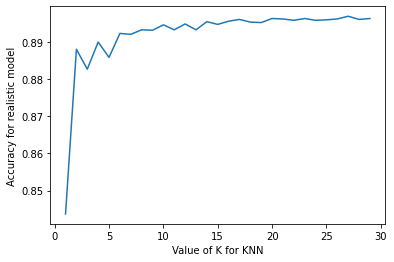

In [ ]:
plt.plot(range(1,30), b)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy for realistic model')
plt.show()

In [ ]:
b.index(max(b))

26

In [ ]:
max(b)

0.9110921916808562

In [ ]:
X4

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
rf2 = RandomForestRegressor()
rf2.fit(X4, y)
feat_importances2 = pd.Series(rf2.feature_importances_, index=X4.columns)

Text(0.5, 0, 'relative importance')

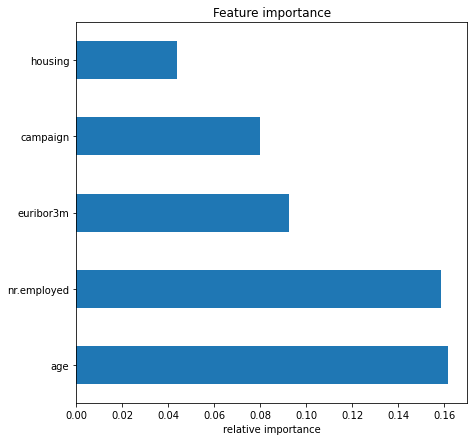

In [ ]:
f, ax = plt.subplots(figsize=(7, 7))
feat_importances2.nlargest(5).plot(kind='barh')
plt.title('Feature importance')
plt.xlabel('relative importance')

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


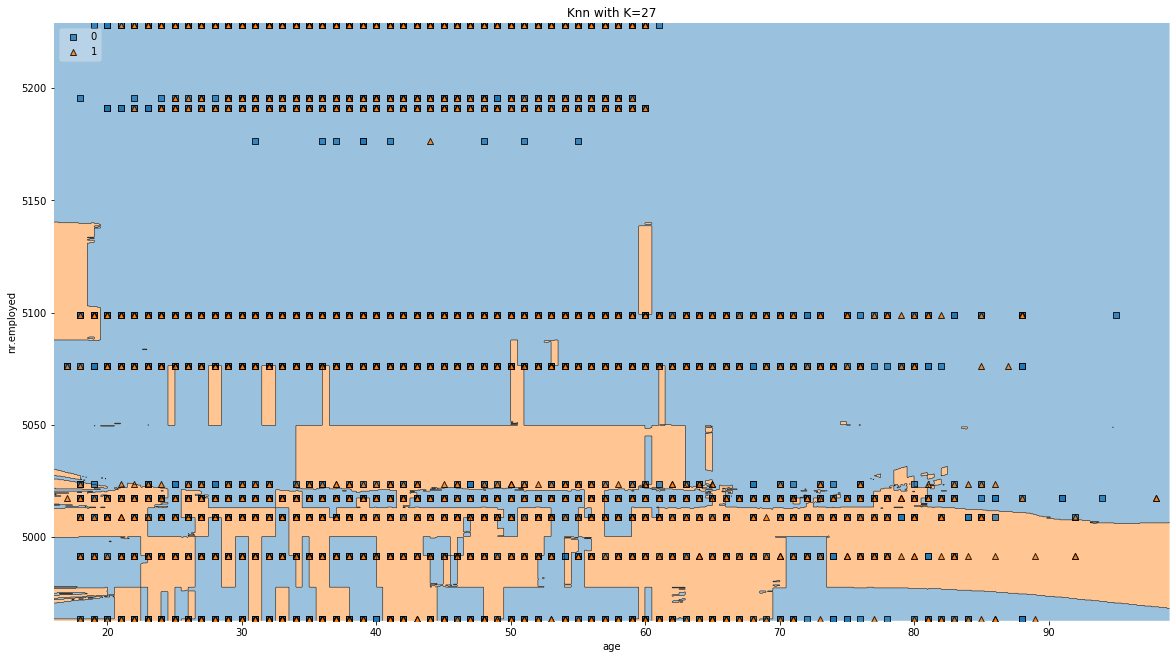

In [ ]:
f, ax = plt.subplots(figsize=(20, 11))
x2 = X4[['age','nr.employed']].values
y2 = df['y'].astype(int).values
clf2 = neighbors.KNeighborsClassifier(n_neighbors=27)
clf2.fit(x2, y2)
plot_decision_regions(x2, y2, clf=clf2, legend=2)
plt.xlabel('age')
plt.ylabel('nr.employed')
plt.title('Knn with K=27')
plt.show()